In [321]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport
import chardet

In [322]:
#Data Preparation of Climate dataset
climate_data = pd.read_excel('Dataset/archive/Merged_climate_data.xlsx')
climate_data.columns = climate_data.columns.str.replace('-07', '')
climate_data

,code,name,1950,1951,1952,1953,1954,1955,1956,1957,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,SheetName
0,AGO,Angola,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,fd
1,AND,Andorra,12.52,13.23,10.87,12.00,12.39,10.18,13.64,12.21,...,11.38,11.73,9.75,9.27,10.27,10.99,9.85,10.87,9.34,fd
2,ASM,American Samoa (U.S.),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,fd
3,AGO,Angola,45.40,62.05,65.64,84.28,52.09,84.92,86.49,106.08,...,87.80,89.09,91.35,90.15,97.34,87.53,92.94,87.56,100.19,pr
4,AND,Andorra,79.64,111.16,93.81,77.02,87.54,83.76,86.19,85.32,...,86.50,115.51,110.31,86.19,83.41,91.09,124.84,95.41,104.33,pr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,ALB,Albania,86.20,90.25,111.80,74.71,100.59,124.79,115.01,98.20,...,113.45,115.90,116.14,95.40,127.12,96.53,125.68,105.76,95.45,pr
620,DZA,Algeria,5.15,7.24,4.92,6.25,5.42,6.07,5.13,8.44,...,6.15,5.65,6.11,5.88,5.24,4.86,7.42,5.96,4.23,pr
621,AFG,Afghanistan,10.00,10.92,11.05,11.35,11.10,11.94,11.69,9.83,...,11.59,12.83,12.31,12.95,13.74,13.53,13.72,12.96,12.31,tas
622,ALB,Albania,13.19,12.81,12.98,11.92,11.51,12.19,11.40,12.26,...,13.06,13.20,13.15,13.26,13.16,13.13,13.73,13.57,13.37,tas


In [323]:
# Unpivot the DataFrame
climate_data = pd.melt(climate_data, id_vars=['code', 'name', 'SheetName'], var_name='Year', value_name='Value')
climate_data

,code,name,SheetName,Year,Value
0,AGO,Angola,fd,1950,0.00
1,AND,Andorra,fd,1950,12.52
2,ASM,American Samoa (U.S.),fd,1950,0.00
3,AGO,Angola,pr,1950,45.40
4,AND,Andorra,pr,1950,79.64
...,...,...,...,...,...
44299,ALB,Albania,pr,2020,95.45
44300,DZA,Algeria,pr,2020,4.23
44301,AFG,Afghanistan,tas,2020,12.31
44302,ALB,Albania,tas,2020,13.37


In [324]:
climate_data.columns = ['Country_Code', 'Country', 'Climate Variables', 'Year', 'Value']

In [325]:
#Pivot the Climate Variables values as columns
climate_data = climate_data.pivot_table(index=['Country_Code', 'Country', 'Year'], columns='Climate Variables', values='Value')
climate_data.reset_index(inplace=True)
climate_data

Climate Variables,Country_Code,Country,Year,fd,pr,tas
0,ABW,Aruba (Neth.),1950,0.0,87.00,25.89
1,ABW,Aruba (Neth.),1951,0.0,50.20,26.56
2,ABW,Aruba (Neth.),1952,0.0,44.75,26.58
3,ABW,Aruba (Neth.),1953,0.0,44.66,26.59
4,ABW,Aruba (Neth.),1954,0.0,70.32,26.07
...,...,...,...,...,...,...
14763,ZWE,Zimbabwe,2016,0.0,59.72,22.36
14764,ZWE,Zimbabwe,2017,0.0,81.14,21.23
14765,ZWE,Zimbabwe,2018,0.0,56.38,21.93
14766,ZWE,Zimbabwe,2019,0.0,50.78,22.45


In [326]:
climate_data.rename(columns={'fd': 'No of frost days', 'pr': 'Precipitation', 'tas':'Avg temperature'}, inplace=True)

In [327]:
# Data Visualization 
# ['New Zealand', 'Denmark', 'Argentina', 'Uruguay', 'Ireland']
# [Ethiopia, Nigeria, Kenya, India, Cambodia, Indonesia]

def plot_histplot(df, factor, xlabel):
    # Create lists of countries to include in each subplot
    countries_group1 = ['New Zealand', 'Denmark', 'Argentina', 'Uruguay', 'Ireland']
    countries_group2 = ['Ethiopia', 'Nigeria', 'Kenya', 'India', 'Cambodia', 'Indonesia']

    # Create a dictionary to map colors to countries
    country_colors = {
        'New Zealand': 'blue',
        'Denmark': 'red',
        'Argentina': 'green',
        'Uruguay': 'orange',
        'Ireland': 'purple',
        'Ethiopia': 'brown',
        'Nigeria': 'pink',
        'Kenya': 'gray',
        'India': 'cyan',
        'Cambodia': 'magenta',
        'Indonesia': 'lime',
    }

    # Filter the data for the selected countries
    filtered_data = df[df['Country'].isin(countries_group1 + countries_group2)]
    filtered_data = filtered_data[~pd.isna(filtered_data)]

    # Create subplots with shared x-axis limits
    fig, axes = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

    # Subplot 1 for countries_group1
    axes[0].set_title('Group 1: '+factor)
    for country in countries_group1:
        axes[0].hist(filtered_data[filtered_data['Country'] == country][factor], bins=20, alpha=0.5, label=country, color=country_colors[country])
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel('Frequency')
    axes[0].legend(loc='upper right')

    # Subplot 2 for countries_group2
    axes[1].set_title('Group 2: '+factor)
    for country in countries_group2:
        axes[1].hist(filtered_data[filtered_data['Country'] == country][factor], bins=20, alpha=0.5, label=country, color=country_colors[country])
    axes[1].set_xlabel(xlabel)
    axes[1].set_ylabel('Frequency')
    axes[1].legend(loc='upper left')

    # Set the same x-axis limits for both subplots
#     plt.xlim([min(filtered_data[factor]), max(filtered_data[factor])])

    plt.tight_layout()
    plt.show()


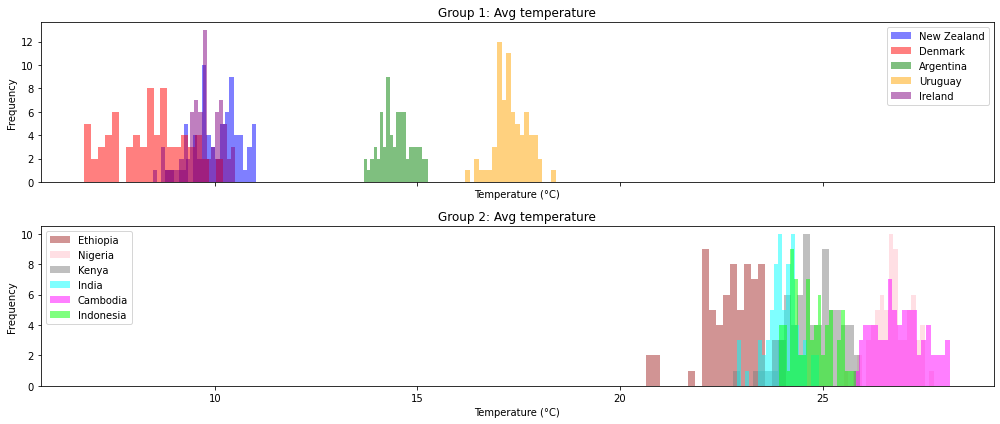

In [328]:
plot_histplot(climate_data, 'Avg temperature', 'Temperature (°C)')

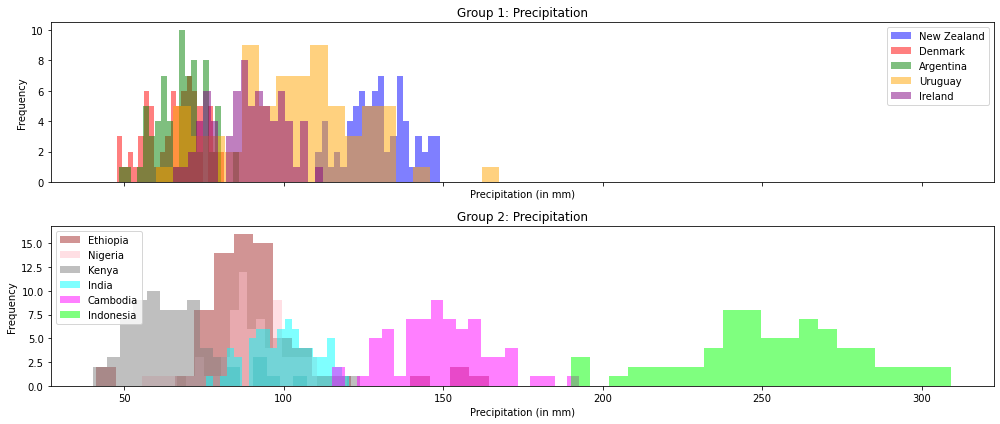

In [329]:
plot_histplot(climate_data, 'Precipitation', 'Precipitation (in mm)')

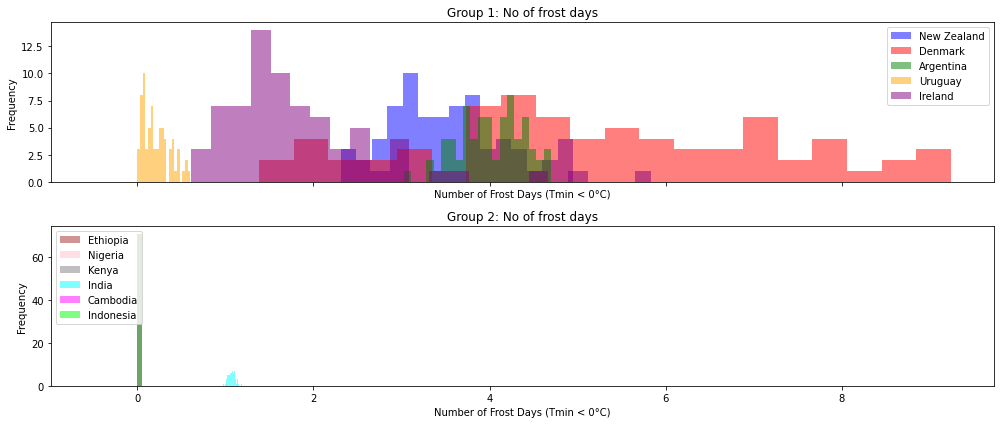

In [330]:
plot_histplot(climate_data, 'No of frost days', 'Number of Frost Days (Tmin < 0°C)')

Observations:


In [331]:
#Import World Bank Indicators data
world_bank_data = pd.read_csv('Dataset/archive/World_Bank_Indicators.csv')
world_bank_data.dropna(inplace = True)
world_bank_data.columns = [col.split(' [')[0] for col in world_bank_data.columns]
world_bank_data.head(5)

,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,AFG,"Use of IMF credit (DOD, current US$)",DT.DOD.DIMF.CD,..,..,..,..,..,..,...,375643168.3,334839124.6,300161714.8,276984771.4,284853905.2,274596496.6,276923268.4,628740557.2,1185327218,..
1,Afghanistan,AFG,Control of Corruption: Estimate,CC.EST,..,..,..,..,..,..,...,-1.44590842723846,-1.36474287509918,-1.3485871553421,-1.53404927253723,-1.52172565460205,-1.48977172374725,-1.40771043300629,-1.48053777217865,-1.14237689971924,..
2,Albania,ALB,"Use of IMF credit (DOD, current US$)",DT.DOD.DIMF.CD,..,..,..,..,..,..,...,96755468.2,150856823.2,243583720.9,387084198.2,488777110.1,470321203.4,447707759.2,627019436.4,733945608.9,..
3,Albania,ALB,Control of Corruption: Estimate,CC.EST,..,..,..,..,..,..,...,-0.750955939292908,-0.586141347885132,-0.520959854125977,-0.44898048043251,-0.458256989717484,-0.524145126342773,-0.543374061584473,-0.551931083202362,-0.5559241771698,..
4,Algeria,DZA,"Use of IMF credit (DOD, current US$)",DT.DOD.DIMF.CD,..,..,..,..,..,..,...,1845203857.4,1735936449.6,1660361592.5,1610758149.3,1706376276.2,1666425596.1,1656880871,1725708072,4306075776.8,..


In [332]:
world_bank_data.drop('Series Code', axis=1, inplace=True)

In [333]:
world_bank_data = pd.melt(world_bank_data, id_vars=['Country Name', 'Country Code', 'Series Name'], var_name='Year', value_name='Value')
# world_bank_data.to_csv('World_Bank_Ind.csv', index=False)

In [334]:
# world_bank_data.replace('..', 0.0, inplace=True)
world_bank_data['Value'] = world_bank_data['Value'].replace('..', pd.NA)

# Drop rows where 'Value' is NaN
world_bank_data = world_bank_data.dropna(subset=['Value'])

In [335]:
world_bank_data = world_bank_data.pivot_table(index=['Country Name', 'Country Code', 'Year'], columns='Series Name', values='Value')
world_bank_data.reset_index(inplace=True)
world_bank_data.rename(columns={'Country Name': 'Country'}, inplace=True)
world_bank_data.drop('Country Code', axis=1, inplace=True)
world_bank_data

Series Name,Country,Year,Control of Corruption: Estimate,"Use of IMF credit (DOD, current US$)"
0,Afghanistan,1996,-1.291705,NaN
1,Afghanistan,1998,-1.176012,NaN
2,Afghanistan,2000,-1.271724,NaN
3,Afghanistan,2002,-1.251137,NaN
4,Afghanistan,2003,-1.344180,NaN
...,...,...,...,...
7548,Zimbabwe,2017,-1.281081,4.821848e+08
7549,Zimbabwe,2018,-1.227581,4.708956e+08
7550,Zimbabwe,2019,-1.273280,4.681985e+08
7551,Zimbabwe,2020,-1.289440,4.876475e+08


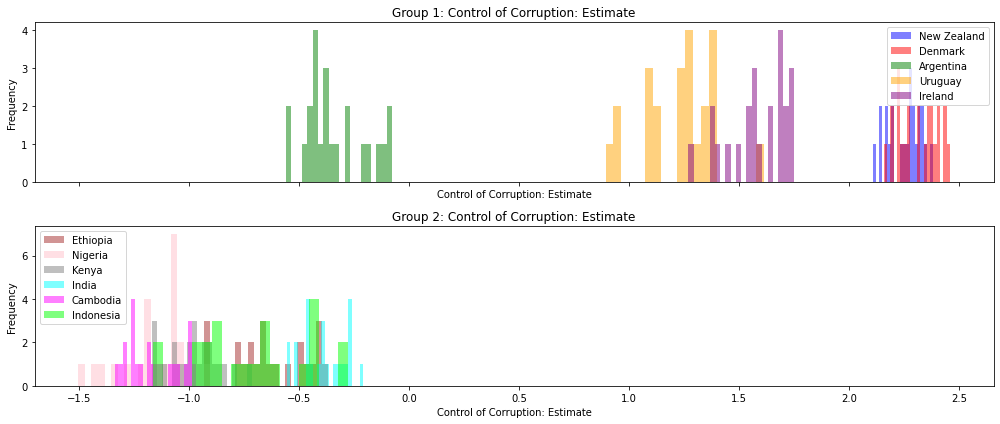

In [336]:
plot_histplot(world_bank_data, 'Control of Corruption: Estimate', 'Control of Corruption: Estimate')

In [337]:


countries_group1 = ['Argentina']
countries_group2 = ['Ethiopia', 'Nigeria', 'Kenya', 'India', 'Cambodia', 'Indonesia']


def plot_lineplot(df, factor, title):

    # Create a figure and axis
    fig, ax3 = plt.subplots(1, figsize=(16, 8))

    # Filter the data for a specific country
    for i, country in enumerate(countries_group1 + countries_group2):
        country_data = df[df['Country'] == country]

    # Create a line plot for "Use of IMF credit" over the years
        plt.plot(country_data['Year'], country_data[factor], label=country)
    plt.xlabel('Year')
    plt.ylabel(factor)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

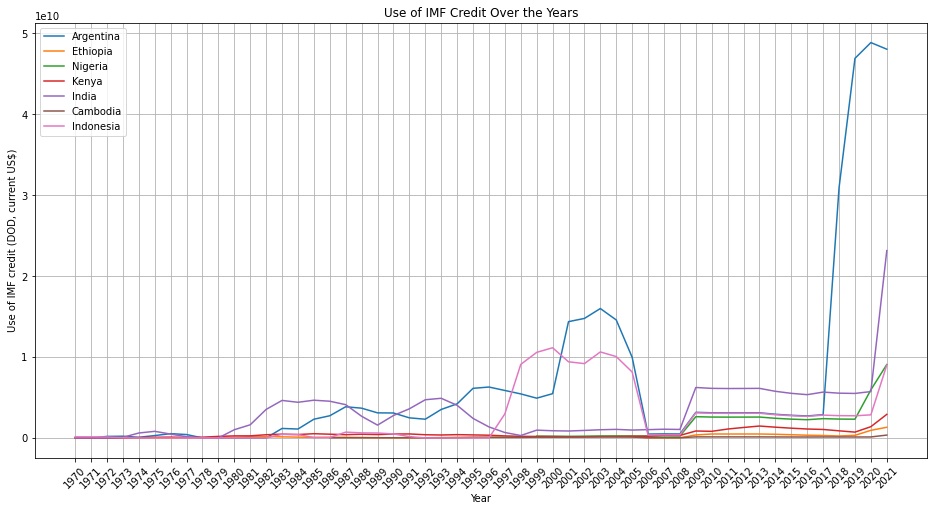

In [338]:
plot_lineplot(world_bank_data, 'Use of IMF credit (DOD, current US$)', 'Use of IMF Credit Over the Years')

In [339]:
world_bank_data['Year']=world_bank_data['Year'].astype(pd.Int64Dtype())
world_bank_data = world_bank_data.loc[world_bank_data['Year'] <= 2007]
world_bank_data

Series Name,Country,Year,Control of Corruption: Estimate,"Use of IMF credit (DOD, current US$)"
0,Afghanistan,1996,-1.291705,NaN
1,Afghanistan,1998,-1.176012,NaN
2,Afghanistan,2000,-1.271724,NaN
3,Afghanistan,2002,-1.251137,NaN
4,Afghanistan,2003,-1.344180,NaN
...,...,...,...,...
7534,Zimbabwe,2003,-1.188868,316710730.0
7535,Zimbabwe,2004,-1.253563,309047437.0
7536,Zimbabwe,2005,-1.314617,125085422.6
7537,Zimbabwe,2006,-1.372949,128123730.4


In [340]:
#Import World Bank Education Data
world_bank_edu = pd.read_csv('Dataset/archive/World_Bank_Education.csv')
world_bank_edu.dropna(inplace = True)
world_bank_edu.columns = [col.split(' [')[0] for col in world_bank_edu.columns]
world_bank_edu.drop('Series Code', axis=1, inplace=True)
world_bank_edu

,Country Name,Country Code,Series,1960,1961,1962,1963,1964,1965,1966,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,"Gross enrolment ratio, primary to tertiary, bo...",..,..,..,..,..,..,..,...,65.79363,..,..,..,64.43013,..,..,..,..,..
1,Afghanistan,AFG,"Gross enrolment ratio, primary to tertiary, fe...",..,..,..,..,..,..,..,...,51.30789,..,..,..,49.19871,..,..,..,..,..
2,Afghanistan,AFG,"Gross enrolment ratio, primary to tertiary, ma...",..,..,..,..,..,..,..,...,79.51016,..,..,..,78.91602,..,..,..,..,..
3,Albania,ALB,"Gross enrolment ratio, primary to tertiary, bo...",..,..,..,..,..,..,..,...,88.73256,87.41363,85.23001,84.96134,83.89356,85.01313,..,..,..,..
4,Albania,ALB,"Gross enrolment ratio, primary to tertiary, fe...",..,..,..,..,..,..,..,...,92.07545,90.64685,88.91327,89.25792,88.64442,90.16838,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,Zambia,ZMB,"Gross enrolment ratio, primary to tertiary, fe...",..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
812,Zambia,ZMB,"Gross enrolment ratio, primary to tertiary, ma...",..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
813,Zimbabwe,ZWE,"Gross enrolment ratio, primary to tertiary, bo...",..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
814,Zimbabwe,ZWE,"Gross enrolment ratio, primary to tertiary, fe...",..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [341]:
world_bank_edu = pd.melt(world_bank_edu, id_vars=['Country Name', 'Country Code', 'Series'], var_name='Year', value_name='Value')
world_bank_edu

,Country Name,Country Code,Series,Year,Value
0,Afghanistan,AFG,"Gross enrolment ratio, primary to tertiary, bo...",1960,..
1,Afghanistan,AFG,"Gross enrolment ratio, primary to tertiary, fe...",1960,..
2,Afghanistan,AFG,"Gross enrolment ratio, primary to tertiary, ma...",1960,..
3,Albania,ALB,"Gross enrolment ratio, primary to tertiary, bo...",1960,..
4,Albania,ALB,"Gross enrolment ratio, primary to tertiary, fe...",1960,..
...,...,...,...,...,...
52219,Zambia,ZMB,"Gross enrolment ratio, primary to tertiary, fe...",2023,..
52220,Zambia,ZMB,"Gross enrolment ratio, primary to tertiary, ma...",2023,..
52221,Zimbabwe,ZWE,"Gross enrolment ratio, primary to tertiary, bo...",2023,..
52222,Zimbabwe,ZWE,"Gross enrolment ratio, primary to tertiary, fe...",2023,..


In [342]:
# world_bank_edu.replace('..', 0.0, inplace=True) #Imputation?
world_bank_edu['Value'] = world_bank_edu['Value'].replace('..', pd.NA)

# Drop rows where 'Value' is NaN
world_bank_edu = world_bank_edu.dropna(subset=['Value'])

In [343]:
world_bank_edu = world_bank_edu.pivot_table(index=['Country Name', 'Country Code', 'Year'], columns='Series', values='Value')
world_bank_edu.reset_index(inplace=True)
world_bank_edu.rename(columns={'Country Name': 'Country'}, inplace=True)
world_bank_edu.drop('Country Code', axis=1, inplace=True)
world_bank_edu

Series,Country,Year,"Gross enrolment ratio, primary to tertiary, both sexes (%)","Gross enrolment ratio, primary to tertiary, female (%)","Gross enrolment ratio, primary to tertiary, male (%)"
0,Afghanistan,1970,16.05820,4.50856,27.41987
1,Afghanistan,1971,16.86606,NaN,NaN
2,Afghanistan,1972,17.40084,4.74242,29.74823
3,Afghanistan,1973,17.80448,5.07726,30.16882
4,Afghanistan,1974,18.09427,5.11067,30.66925
...,...,...,...,...,...
5895,Zimbabwe,2001,62.81822,60.43868,65.22950
5896,Zimbabwe,2002,59.85826,57.56935,62.19583
5897,Zimbabwe,2003,57.87850,55.73510,60.08197
5898,Zimbabwe,2012,66.51386,64.46115,68.64404


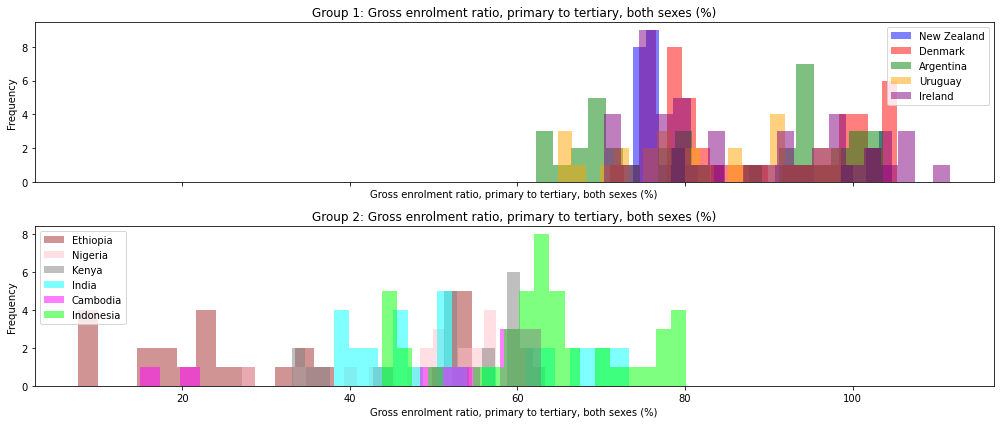

In [344]:
plot_histplot(world_bank_edu, 'Gross enrolment ratio, primary to tertiary, both sexes (%)', 'Gross enrolment ratio, primary to tertiary, both sexes (%)')

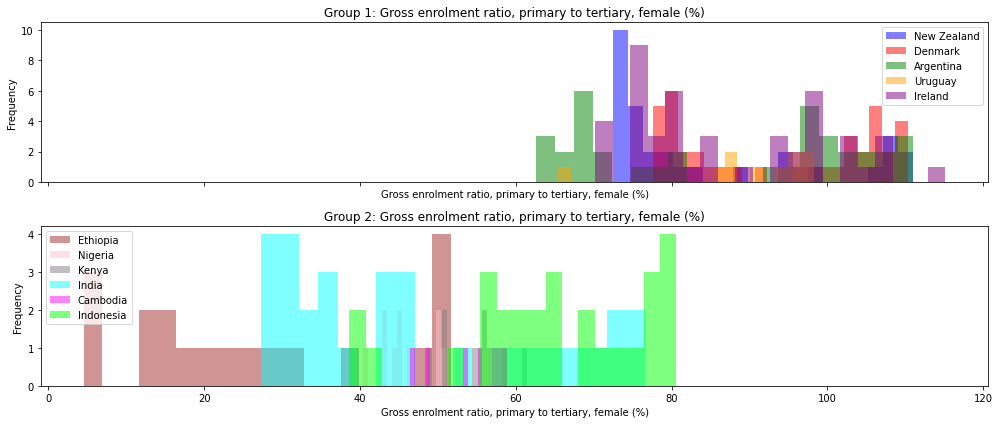

In [345]:
plot_histplot(world_bank_edu, 'Gross enrolment ratio, primary to tertiary, female (%)', 'Gross enrolment ratio, primary to tertiary, female (%)')

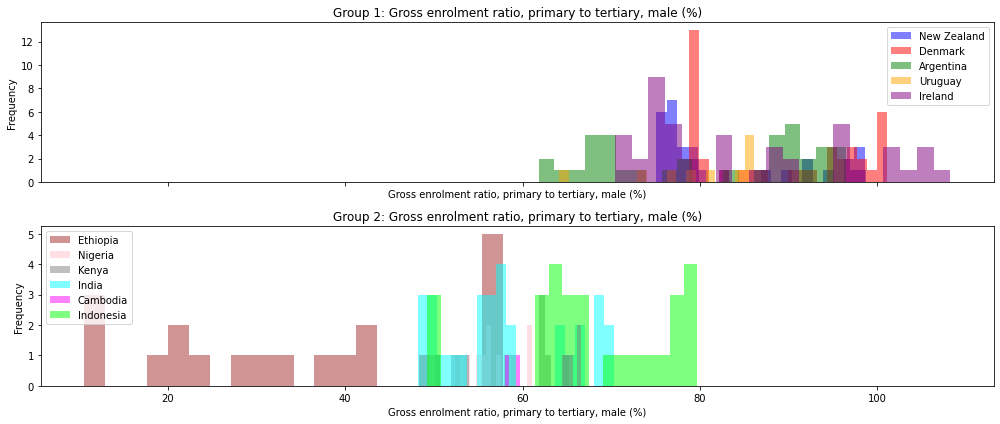

In [346]:
plot_histplot(world_bank_edu, 'Gross enrolment ratio, primary to tertiary, male (%)', 'Gross enrolment ratio, primary to tertiary, male (%)')

In [347]:
#Import World Bank Transport Infrastructure Data
#UnicodeDecodeError you're encountering typically occurs when you're trying to read a CSV file that contains characters or character encodings that aren't compatible with the default UTF-8 encoding

# Detect the encoding of the file
with open('Dataset/archive/World_Bank_Transport_Infrastructure.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read()) #{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [348]:
world_bank_transport = pd.read_csv('Dataset/archive/World_Bank_Transport_Infrastructure.csv', encoding='ISO-8859-1')
world_bank_transport.dropna(inplace = True)
world_bank_transport.columns = [col.split(' [')[0] for col in world_bank_transport.columns]
world_bank_transport.drop('Series Code', axis=1, inplace=True)
world_bank_transport.drop('Country Code', axis=1, inplace=True)
world_bank_transport

,Country Name,Series Name,2007,2010,2012,2014,2016,2018
0,Afghanistan,Quality of trade- and transport-related infras...,1.1,1.873596,2.003611,1.818951,1.835473,1.807143
1,Albania,Quality of trade- and transport-related infras...,2.33333,2.144558,2.426877,..,1.980952,2.293674
2,Algeria,Quality of trade- and transport-related infras...,1.83333,2.059659,2.016162,2.540816,2.577318,2.421383
3,Angola,Quality of trade- and transport-related infras...,2.25,1.6875,2.482869,2.105263,2.133789,1.857143
4,Argentina,Quality of trade- and transport-related infras...,2.80556,2.750209,2.943176,2.831158,2.856412,2.773509
...,...,...,...,...,...,...,...,...
163,"Venezuela, RB",Quality of trade- and transport-related infras...,2.51064,2.442363,2.167156,2.605082,2.345295,2.096936
164,Vietnam,Quality of trade- and transport-related infras...,2.5,2.561527,2.681854,3.112863,2.695191,3.00549
165,"Yemen, Rep.",Quality of trade- and transport-related infras...,2.07692,2.348214,2.622449,1.87407,..,2.116794
166,Zambia,Quality of trade- and transport-related infras...,2,1.833333,..,2.310606,2.262771,2.303431


In [349]:
world_bank_transport = pd.melt(world_bank_transport, id_vars=['Country Name', 'Series Name'], var_name='Year', value_name='Value')
world_bank_transport

,Country Name,Series Name,Year,Value
0,Afghanistan,Quality of trade- and transport-related infras...,2007,1.1
1,Albania,Quality of trade- and transport-related infras...,2007,2.33333
2,Algeria,Quality of trade- and transport-related infras...,2007,1.83333
3,Angola,Quality of trade- and transport-related infras...,2007,2.25
4,Argentina,Quality of trade- and transport-related infras...,2007,2.80556
...,...,...,...,...
1003,"Venezuela, RB",Quality of trade- and transport-related infras...,2018,2.096936
1004,Vietnam,Quality of trade- and transport-related infras...,2018,3.00549
1005,"Yemen, Rep.",Quality of trade- and transport-related infras...,2018,2.116794
1006,Zambia,Quality of trade- and transport-related infras...,2018,2.303431


In [350]:
world_bank_transport['Value'] = world_bank_transport['Value'].replace('..', pd.NA)

# Drop rows where 'Value' is NaN
world_bank_transport = world_bank_transport.dropna(subset=['Value'])


In [351]:
world_bank_transport = world_bank_transport.pivot_table(index=['Country Name', 'Year'], columns='Series Name', values='Value')
world_bank_transport.reset_index(inplace=True)
world_bank_transport.rename(columns={'Country Name': 'Country'}, inplace=True)
world_bank_transport

Series Name,Country,Year,"Quality of trade- and transport-related infrastructure, score (1=low to 5=high)"
0,Afghanistan,2007,1.100000
1,Afghanistan,2010,1.873596
2,Afghanistan,2012,2.003611
3,Afghanistan,2014,1.818951
4,Afghanistan,2016,1.835473
...,...,...,...
934,Zimbabwe,2007,1.866670
935,Zimbabwe,2012,2.200000
936,Zimbabwe,2014,2.248457
937,Zimbabwe,2016,2.213516


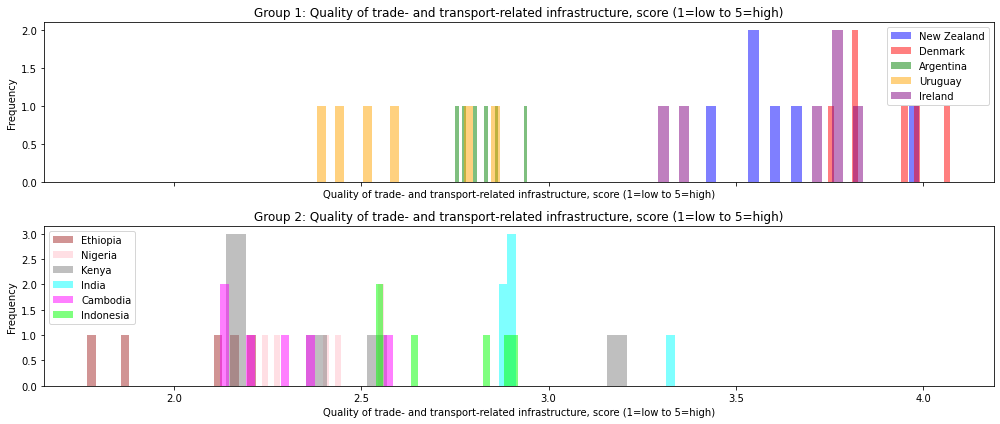

In [352]:
plot_histplot(world_bank_transport, 'Quality of trade- and transport-related infrastructure, score (1=low to 5=high)', 'Quality of trade- and transport-related infrastructure, score (1=low to 5=high)')

In [353]:
world_bank_transport_2007 = world_bank_transport[world_bank_transport['Year']=='2007']
world_bank_transport_2007

Series Name,Country,Year,"Quality of trade- and transport-related infrastructure, score (1=low to 5=high)"
0,Afghanistan,2007,1.10000
6,Albania,2007,2.33333
11,Algeria,2007,1.83333
17,Angola,2007,2.25000
23,Argentina,2007,2.80556
...,...,...,...
912,"Venezuela, RB",2007,2.51064
918,Vietnam,2007,2.50000
924,"Yemen, Rep.",2007,2.07692
929,Zambia,2007,2.00000


In [354]:
#GINI Index
world_GINI_index = pd.read_csv('Dataset/archive/economic-inequality-gini-index.csv')
world_GINI_index = world_GINI_index.rename(columns={'Entity': 'Country Name'})
world_GINI_index.rename(columns={'Country Name': 'Country'}, inplace=True)
world_GINI_index.drop('Code', axis=1, inplace=True)

world_GINI_index

,Country,Year,Gini coefficient
0,Albania,1996,0.270103
1,Albania,2002,0.317390
2,Albania,2005,0.305957
3,Albania,2008,0.299847
4,Albania,2012,0.289605
...,...,...,...
2120,Zambia,2010,0.556215
2121,Zambia,2015,0.571361
2122,Zimbabwe,2011,0.431536
2123,Zimbabwe,2017,0.443371


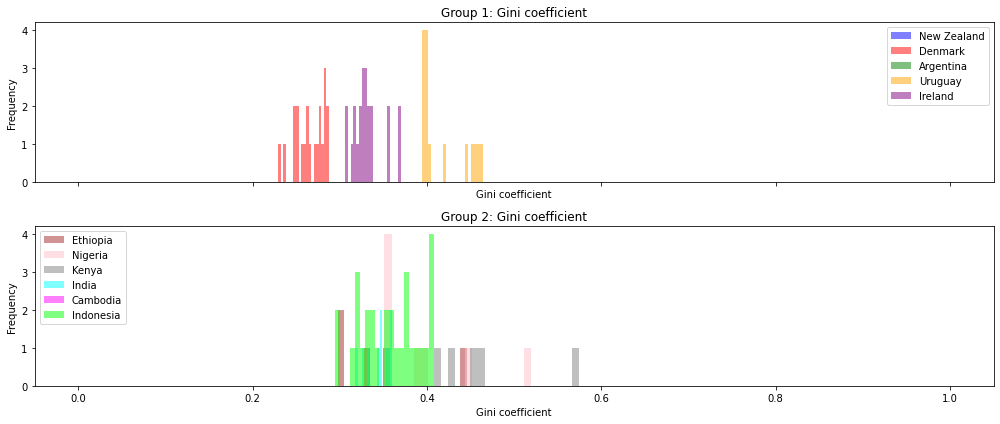

In [355]:
plot_histplot(world_GINI_index, 'Gini coefficient', 'Gini coefficient')

In [356]:
world_GINI_index_2007 = world_GINI_index.loc[world_GINI_index['Year'] <= 2007]

In [357]:
#Land data
land_data = pd.read_csv('Dataset/archive/fao_data_land_data.csv')
agri_land_data = land_data.drop(land_data[land_data['category'] != 'agricultural_area'].index)
agri_land_data.dropna(inplace=True)
agri_land_data = agri_land_data[['country_or_area', 'year', 'value']]
agri_land_data.columns = ['Country', 'Year', 'Area']
agri_land_data = agri_land_data[~agri_land_data['Country'].str.endswith('+')]
agri_land_data

,Country,Year,Area
0,Afghanistan,2007.0,38661.0
1,Afghanistan,2006.0,38659.0
2,Afghanistan,2005.0,38515.0
3,Afghanistan,2004.0,38064.0
4,Afghanistan,2003.0,38899.0
...,...,...,...
11149,Zimbabwe,1965.0,11305.0
11150,Zimbabwe,1964.0,11240.0
11151,Zimbabwe,1963.0,11155.0
11152,Zimbabwe,1962.0,11070.0


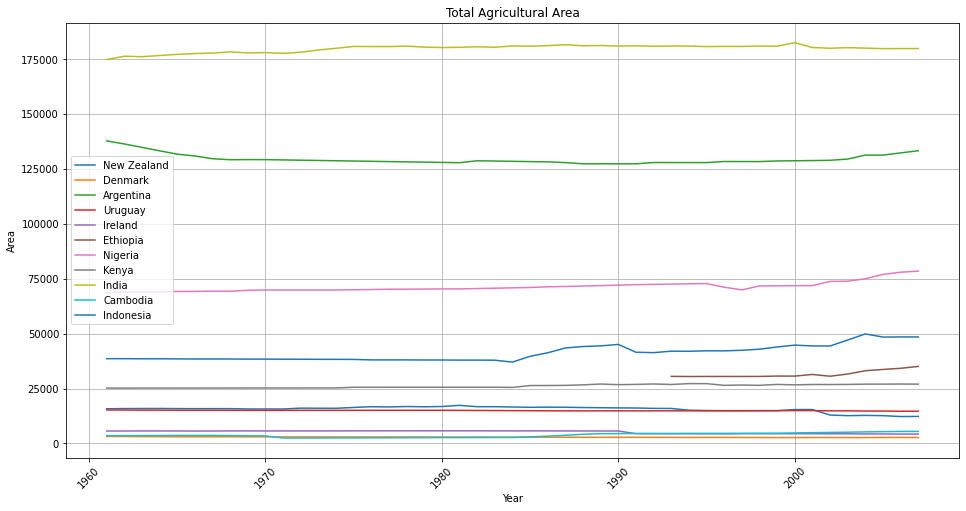

In [358]:
countries_group1 = ['New Zealand', 'Denmark', 'Argentina', 'Uruguay', 'Ireland']
countries_group2 = ['Ethiopia', 'Nigeria', 'Kenya', 'India', 'Cambodia', 'Indonesia']

plot_lineplot(agri_land_data, 'Area', 'Total Agricultural Area')

In [359]:
# Year varies from 2002 to 2014
# Unit kg/ha
world_fertilizer_data = pd.read_csv('Dataset/archive/Environment_Fertilizers_E_All_Data.csv', encoding='ISO-8859-1') #Area
grouped_fertilizer_df = world_fertilizer_data.groupby(['Area', 'Year', 'Item Code'])['Value'].sum().reset_index()
pivot_df = grouped_fertilizer_df.pivot_table(index=['Area', 'Year'], columns='Item Code', values='Value', fill_value=0).reset_index()
pivot_df['Sum'] =  pivot_df[3102] + pivot_df[3103] + pivot_df[3104]
fertilizer_data = pivot_df[['Area', 'Year', 'Sum']]
fertilizer_data.columns = ['Country', 'Year', 'Total Fertilizer Use']
fertilizer_data

,Country,Year,Total Fertilizer Use
0,Afghanistan,2002,3.37
1,Afghanistan,2003,3.22
2,Afghanistan,2004,4.49
3,Afghanistan,2005,4.18
4,Afghanistan,2006,6.20
...,...,...,...
2937,Zimbabwe,2010,33.26
2938,Zimbabwe,2011,25.93
2939,Zimbabwe,2012,20.30
2940,Zimbabwe,2013,27.92


In [360]:
fertilizer_data_2007 = fertilizer_data[fertilizer_data['Year'] <= 2007]


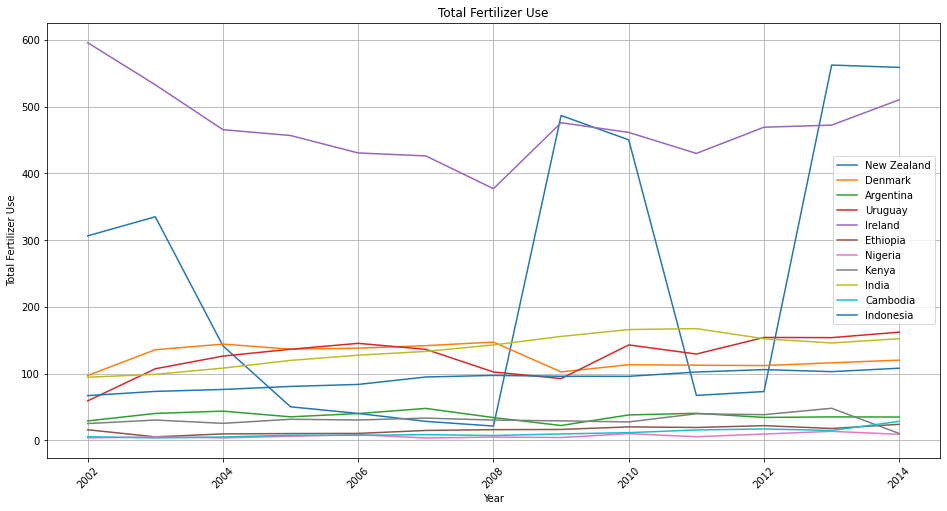

In [361]:
countries_group1 = ['New Zealand', 'Denmark', 'Argentina', 'Uruguay', 'Ireland']
countries_group2 = ['Ethiopia', 'Nigeria', 'Kenya', 'India', 'Cambodia', 'Indonesia']

plot_lineplot(fertilizer_data, 'Total Fertilizer Use', 'Total Fertilizer Use')

"2011 PPP$" in FAO data, means that the values have been adjusted to a common standard (2011) to facilitate cross-country comparisons. This is important in agricultural and economic analyses to account for differences in the cost of living and inflation rates between countries.

In [362]:
#Agriculture Research Spending
world_research_data = pd.read_csv('Dataset/archive/ASTI_Research_Spending_E_All_Data.csv', encoding='ISO-8859-1') 
world_research_data = world_research_data[['Country', 'Element', 'Year', 'Value']]
world_research_data.drop(world_research_data[world_research_data['Element'] != '2011 PPP$'].index, inplace = True)
world_research_data.drop('Element', axis=1, inplace=True)
world_research_data.columns = ['Country', 'Year', 'Agriculture Research Spending']

world_research_data

,Country,Year,Agriculture Research Spending
4,Algeria,2009,76.9
5,Algeria,2010,71.0
6,Algeria,2011,82.9
7,Algeria,2012,91.6
14,Antigua and Barbuda,2007,1.5
...,...,...,...
1520,Zimbabwe,2007,11.8
1521,Zimbabwe,2008,14.2
1522,Zimbabwe,2009,8.1
1523,Zimbabwe,2010,15.6


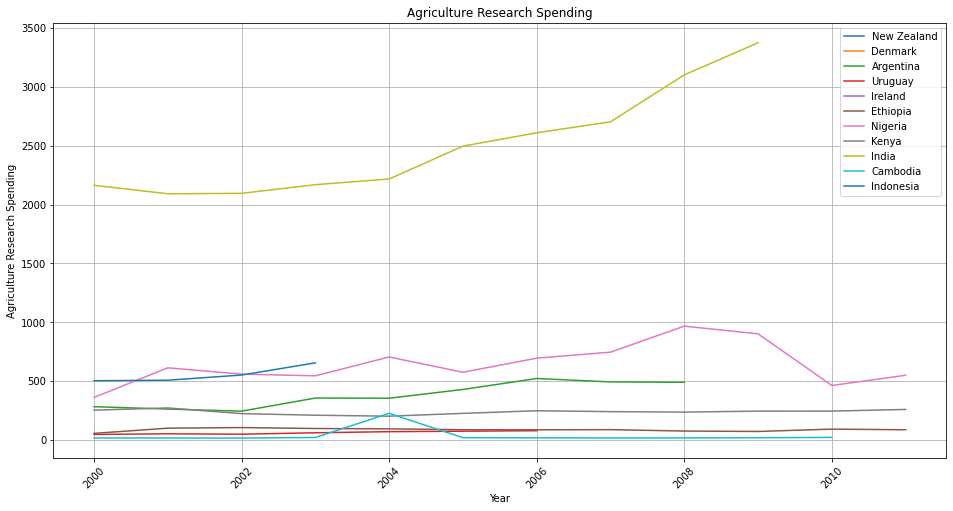

In [363]:
countries_group1 = ['New Zealand', 'Denmark', 'Argentina', 'Uruguay', 'Ireland']
countries_group2 = ['Ethiopia', 'Nigeria', 'Kenya', 'India', 'Cambodia', 'Indonesia']

plot_lineplot(world_research_data, 'Agriculture Research Spending', 'Agriculture Research Spending')

In [364]:
#Combine all datasets with the FAO Agriculture data
prod_ind_data = pd.read_csv('Dataset/archive/fao_data_production_indices_data.csv')
prod_ind_data['year']=prod_ind_data['year'].astype(pd.Int64Dtype())
agri_data = prod_ind_data[prod_ind_data['category']=='agriculture_pin']
agri_data.dropna(inplace=True)

gross_prod_data = agri_data.drop(agri_data[agri_data['element'] != 'Gross Production 1999-2001 (1000 I$)'].index)
gross_prod_data = gross_prod_data[['country_or_area', 'year', 'value']]
gross_prod_data.columns = ['Country', 'Year', 'Gross_Production']

gross_prod_data = gross_prod_data[~gross_prod_data.Country.str.endswith('+')]
gross_prod_data

C:\Users\saumy\AppData\Local\Temp\ipykernel_10536\2232703584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agri_data.dropna(inplace=True)


,Country,Year,Gross_Production
0,Afghanistan,2007,2486910.0
1,Afghanistan,2006,2278516.0
2,Afghanistan,2005,2524097.0
3,Afghanistan,2004,2226346.0
4,Afghanistan,2003,2289434.0
...,...,...,...
63856,Zimbabwe,1965,687546.0
63857,Zimbabwe,1964,740738.0
63858,Zimbabwe,1963,625430.0
63859,Zimbabwe,1962,679806.0


In [365]:
#World GDP Data
world_gdp_data = pd.read_csv('Dataset/archive/world_country_gdp_usd.csv')
world_gdp_data['Country Name'] = world_gdp_data['Country Name'].replace('United States', 'United States of America')
world_gdp_data.drop(['Country Code'], axis = 1, inplace=True)
world_gdp_data.columns = ['Country', 'Year', 'GDP', 'GDP_Per_Capita']
world_gdp_data

,Country,Year,GDP,GDP_Per_Capita
0,Aruba,1960,NaN,NaN
1,Africa Eastern and Southern,1960,2.129059e+10,162.726326
2,Afghanistan,1960,5.377778e+08,59.773234
3,Africa Western and Central,1960,1.040414e+10,107.930722
4,Angola,1960,NaN,NaN
...,...,...,...,...
16487,Kosovo,2021,9.007159e+09,4986.582469
16488,"Yemen, Rep.",2021,2.106169e+10,690.759273
16489,South Africa,2021,4.199460e+11,6994.211654
16490,Zambia,2021,2.120306e+10,1120.630171


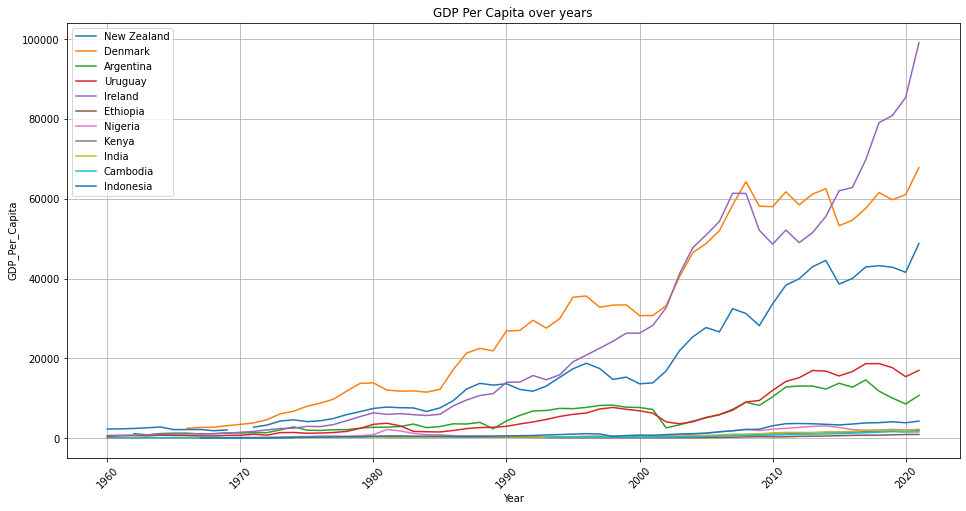

In [366]:
#Data Visualization of GDP
countries_group1 = ['New Zealand', 'Denmark', 'Argentina', 'Uruguay', 'Ireland']
countries_group2 = ['Ethiopia', 'Nigeria', 'Kenya', 'India', 'Cambodia', 'Indonesia']

plot_lineplot(world_gdp_data, 'GDP_Per_Capita', 'GDP Per Capita over years')

In [367]:
#Population data
population_data = pd.read_csv('Dataset/archive/Population_E_All_Data.csv', encoding='ISO-8859-1')
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf4 in position 252929: invalid continuation byte
population_data = population_data[population_data['Element'] == 'Total Population - Both sexes']
population_data = population_data[['Area', 'Year', 'Unit', 'Value']]
population_data['Population'] = population_data['Value'] * 1000
population_data.drop(['Unit', 'Value'], axis = 1, inplace=True)
population_data.rename(columns={'Area': 'Country'}, inplace=True)

population_data

,Country,Year,Population
0,Afghanistan,1950,7.752120e+06
1,Afghanistan,1951,7.839510e+06
2,Afghanistan,1952,7.934980e+06
3,Afghanistan,1953,8.038600e+06
4,Afghanistan,1954,8.150450e+06
...,...,...,...
158892,Net Food Importing Developing Countries,2096,4.161182e+09
158893,Net Food Importing Developing Countries,2097,4.180948e+09
158894,Net Food Importing Developing Countries,2098,4.200209e+09
158895,Net Food Importing Developing Countries,2099,4.218962e+09


In [368]:
#GHI data
sheet_index = 2
GHI_data = pd.read_excel('Dataset/archive/Global_Hunger_Index_Scores.xlsx', sheet_name=sheet_index)
GHI_data.columns = GHI_data.iloc[1]
GHI_data = GHI_data.iloc[2:-3] #Delete the first and bottom 2 rows
GHI_data.columns = ['Country', '2000', '2007', '2014', '2022', 'Absolute change since 2014', '% change since 2014']
GHI_data = GHI_data[['Country', '2000', '2007', '2014', '2022']]
#The dataset contains non-numeric values like '-'
# GHI_2007['2007'] = pd.to_numeric(GHI_2007['2007'], errors='coerce')
# GHI_2007.dropna(inplace = True)
GHI_data = pd.melt(GHI_data, id_vars=['Country'], var_name='Year', value_name='GHI')
GHI_data

,Country,Year,GHI
0,Afghanistan,2000,50.3
1,Albania,2000,20.7
2,Algeria,2000,14.5
3,Angola,2000,64.9
4,Argentina,2000,6.6
...,...,...,...
539,Venezuela (Boliv. Rep. of),2022,19.9
540,Viet Nam,2022,11.9
541,Yemen,2022,45.1
542,Zambia,2022,29.3


In [369]:
#Merge with GDP Data
agri_data = pd.merge(gross_prod_data, world_gdp_data, how='inner', on=['Country','Year'])
#Climate data
climate_data['Year']=climate_data['Year'].astype(pd.Int64Dtype())
agri_data = pd.merge(agri_data, climate_data, how='inner', on=['Country','Year']) 
#Socio-economic data

agri_data = pd.merge(agri_data, world_bank_data, how='inner', on=['Country','Year']) #Same?

world_bank_edu['Year']=world_bank_edu['Year'].astype(pd.Int64Dtype())
agri_data = pd.merge(agri_data, world_bank_edu, how='inner', on=['Country','Year'])

agri_land_data['Year']=agri_land_data['Year'].astype(pd.Int64Dtype())
agri_data = pd.merge(agri_data, agri_land_data, how='inner', on=['Country','Year'])
agri_data


agri_data = pd.merge(agri_data, population_data, how='inner', on=['Country','Year'])

# world_bank_transport['Year']=world_bank_transport['Year'].astype(pd.Int64Dtype())
# agri_data = pd.merge(agri_data, world_bank_transport, how='outer', on=['Country','Year'])
# print(world_bank_transport.info())
agri_data

,Country,Year,Gross_Production,GDP,GDP_Per_Capita,Country_Code,No of frost days,Precipitation,Avg temperature,Control of Corruption: Estimate,"Use of IMF credit (DOD, current US$)","Gross enrolment ratio, primary to tertiary, both sexes (%)","Gross enrolment ratio, primary to tertiary, female (%)","Gross enrolment ratio, primary to tertiary, male (%)",Area,Population
0,Afghanistan,2004,2226346.0,5.226779e+09,211.382074,AFG,8.27,26.62,13.19,-1.350647,NaN,50.92417,29.09865,71.26862,38064.0,24119000.0
1,Afghanistan,2003,2289434.0,4.515559e+09,190.683814,AFG,9.27,29.15,12.47,-1.344180,NaN,44.59988,31.11663,57.12237,38899.0,23064900.0
2,Albania,2007,824818.0,1.067732e+10,3595.038057,ALB,4.36,90.04,12.94,-0.706940,163478853.7,70.70961,71.53020,69.92852,1119.0,3023910.0
3,Albania,2006,858366.0,8.896073e+09,2972.742924,ALB,5.83,90.82,11.85,-0.790545,162459042.7,68.93785,68.95111,68.92506,1120.0,3054330.0
4,Albania,2005,813707.0,8.052074e+09,2673.786584,ALB,6.11,122.86,11.61,-0.813264,158243429.0,68.66119,68.46265,68.85340,1077.0,3079180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,Zimbabwe,1975,1075245.0,4.371301e+09,694.532494,ZWE,0.00,60.95,20.21,NaN,0.0,35.55243,NaN,NaN,12055.0,6115370.0
1797,Zimbabwe,1974,1130246.0,3.982161e+09,654.414192,ZWE,0.00,69.76,19.90,NaN,0.0,35.67601,NaN,NaN,12020.0,5920940.0
1798,Zimbabwe,1973,939421.0,3.309354e+09,563.033078,ZWE,0.00,59.85,20.94,NaN,0.0,35.31014,NaN,NaN,11935.0,5727040.0
1799,Zimbabwe,1972,1117550.0,2.677729e+09,471.936903,ZWE,0.00,56.73,20.57,NaN,0.0,35.27831,NaN,NaN,11900.0,5535870.0


In [370]:
#Why left and not outer join?
world_bank_transport_2007['Year']=world_bank_transport_2007['Year'].astype(pd.Int64Dtype())
agri_data = pd.merge(agri_data, world_bank_transport_2007, how='left', on=['Country','Year'])
agri_data

C:\Users\saumy\AppData\Local\Temp\ipykernel_10536\3150056122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_bank_transport_2007['Year']=world_bank_transport_2007['Year'].astype(pd.Int64Dtype())


,Country,Year,Gross_Production,GDP,GDP_Per_Capita,Country_Code,No of frost days,Precipitation,Avg temperature,Control of Corruption: Estimate,"Use of IMF credit (DOD, current US$)","Gross enrolment ratio, primary to tertiary, both sexes (%)","Gross enrolment ratio, primary to tertiary, female (%)","Gross enrolment ratio, primary to tertiary, male (%)",Area,Population,"Quality of trade- and transport-related infrastructure, score (1=low to 5=high)"
0,Afghanistan,2004,2226346.0,5.226779e+09,211.382074,AFG,8.27,26.62,13.19,-1.350647,NaN,50.92417,29.09865,71.26862,38064.0,24119000.0,NaN
1,Afghanistan,2003,2289434.0,4.515559e+09,190.683814,AFG,9.27,29.15,12.47,-1.344180,NaN,44.59988,31.11663,57.12237,38899.0,23064900.0,NaN
2,Albania,2007,824818.0,1.067732e+10,3595.038057,ALB,4.36,90.04,12.94,-0.706940,163478853.7,70.70961,71.53020,69.92852,1119.0,3023910.0,2.33333
3,Albania,2006,858366.0,8.896073e+09,2972.742924,ALB,5.83,90.82,11.85,-0.790545,162459042.7,68.93785,68.95111,68.92506,1120.0,3054330.0,NaN
4,Albania,2005,813707.0,8.052074e+09,2673.786584,ALB,6.11,122.86,11.61,-0.813264,158243429.0,68.66119,68.46265,68.85340,1077.0,3079180.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,Zimbabwe,1975,1075245.0,4.371301e+09,694.532494,ZWE,0.00,60.95,20.21,NaN,0.0,35.55243,NaN,NaN,12055.0,6115370.0,NaN
1797,Zimbabwe,1974,1130246.0,3.982161e+09,654.414192,ZWE,0.00,69.76,19.90,NaN,0.0,35.67601,NaN,NaN,12020.0,5920940.0,NaN
1798,Zimbabwe,1973,939421.0,3.309354e+09,563.033078,ZWE,0.00,59.85,20.94,NaN,0.0,35.31014,NaN,NaN,11935.0,5727040.0,NaN
1799,Zimbabwe,1972,1117550.0,2.677729e+09,471.936903,ZWE,0.00,56.73,20.57,NaN,0.0,35.27831,NaN,NaN,11900.0,5535870.0,NaN


In [371]:
#Merge with GINI Index
agri_data = pd.merge(agri_data, world_GINI_index_2007, how='left', on=['Country','Year'])
agri_data

,Country,Year,Gross_Production,GDP,GDP_Per_Capita,Country_Code,No of frost days,Precipitation,Avg temperature,Control of Corruption: Estimate,"Use of IMF credit (DOD, current US$)","Gross enrolment ratio, primary to tertiary, both sexes (%)","Gross enrolment ratio, primary to tertiary, female (%)","Gross enrolment ratio, primary to tertiary, male (%)",Area,Population,"Quality of trade- and transport-related infrastructure, score (1=low to 5=high)",Gini coefficient
0,Afghanistan,2004,2226346.0,5.226779e+09,211.382074,AFG,8.27,26.62,13.19,-1.350647,NaN,50.92417,29.09865,71.26862,38064.0,24119000.0,NaN,NaN
1,Afghanistan,2003,2289434.0,4.515559e+09,190.683814,AFG,9.27,29.15,12.47,-1.344180,NaN,44.59988,31.11663,57.12237,38899.0,23064900.0,NaN,NaN
2,Albania,2007,824818.0,1.067732e+10,3595.038057,ALB,4.36,90.04,12.94,-0.706940,163478853.7,70.70961,71.53020,69.92852,1119.0,3023910.0,2.33333,NaN
3,Albania,2006,858366.0,8.896073e+09,2972.742924,ALB,5.83,90.82,11.85,-0.790545,162459042.7,68.93785,68.95111,68.92506,1120.0,3054330.0,NaN,NaN
4,Albania,2005,813707.0,8.052074e+09,2673.786584,ALB,6.11,122.86,11.61,-0.813264,158243429.0,68.66119,68.46265,68.85340,1077.0,3079180.0,NaN,0.305957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,Zimbabwe,1975,1075245.0,4.371301e+09,694.532494,ZWE,0.00,60.95,20.21,NaN,0.0,35.55243,NaN,NaN,12055.0,6115370.0,NaN,NaN
1797,Zimbabwe,1974,1130246.0,3.982161e+09,654.414192,ZWE,0.00,69.76,19.90,NaN,0.0,35.67601,NaN,NaN,12020.0,5920940.0,NaN,NaN
1798,Zimbabwe,1973,939421.0,3.309354e+09,563.033078,ZWE,0.00,59.85,20.94,NaN,0.0,35.31014,NaN,NaN,11935.0,5727040.0,NaN,NaN
1799,Zimbabwe,1972,1117550.0,2.677729e+09,471.936903,ZWE,0.00,56.73,20.57,NaN,0.0,35.27831,NaN,NaN,11900.0,5535870.0,NaN,NaN


In [372]:
#Fertilizer data
agri_data = pd.merge(agri_data, fertilizer_data_2007, how='left', on=['Country','Year'])
agri_data

,Country,Year,Gross_Production,GDP,GDP_Per_Capita,Country_Code,No of frost days,Precipitation,Avg temperature,Control of Corruption: Estimate,"Use of IMF credit (DOD, current US$)","Gross enrolment ratio, primary to tertiary, both sexes (%)","Gross enrolment ratio, primary to tertiary, female (%)","Gross enrolment ratio, primary to tertiary, male (%)",Area,Population,"Quality of trade- and transport-related infrastructure, score (1=low to 5=high)",Gini coefficient,Total Fertilizer Use
0,Afghanistan,2004,2226346.0,5.226779e+09,211.382074,AFG,8.27,26.62,13.19,-1.350647,NaN,50.92417,29.09865,71.26862,38064.0,24119000.0,NaN,NaN,4.49
1,Afghanistan,2003,2289434.0,4.515559e+09,190.683814,AFG,9.27,29.15,12.47,-1.344180,NaN,44.59988,31.11663,57.12237,38899.0,23064900.0,NaN,NaN,3.22
2,Albania,2007,824818.0,1.067732e+10,3595.038057,ALB,4.36,90.04,12.94,-0.706940,163478853.7,70.70961,71.53020,69.92852,1119.0,3023910.0,2.33333,NaN,72.18
3,Albania,2006,858366.0,8.896073e+09,2972.742924,ALB,5.83,90.82,11.85,-0.790545,162459042.7,68.93785,68.95111,68.92506,1120.0,3054330.0,NaN,NaN,70.49
4,Albania,2005,813707.0,8.052074e+09,2673.786584,ALB,6.11,122.86,11.61,-0.813264,158243429.0,68.66119,68.46265,68.85340,1077.0,3079180.0,NaN,0.305957,91.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,Zimbabwe,1975,1075245.0,4.371301e+09,694.532494,ZWE,0.00,60.95,20.21,NaN,0.0,35.55243,NaN,NaN,12055.0,6115370.0,NaN,NaN,NaN
1797,Zimbabwe,1974,1130246.0,3.982161e+09,654.414192,ZWE,0.00,69.76,19.90,NaN,0.0,35.67601,NaN,NaN,12020.0,5920940.0,NaN,NaN,NaN
1798,Zimbabwe,1973,939421.0,3.309354e+09,563.033078,ZWE,0.00,59.85,20.94,NaN,0.0,35.31014,NaN,NaN,11935.0,5727040.0,NaN,NaN,NaN
1799,Zimbabwe,1972,1117550.0,2.677729e+09,471.936903,ZWE,0.00,56.73,20.57,NaN,0.0,35.27831,NaN,NaN,11900.0,5535870.0,NaN,NaN,NaN


In [373]:

agri_data = pd.merge(agri_data, world_research_data, how='left', on=['Country','Year'])
agri_data

,Country,Year,Gross_Production,GDP,GDP_Per_Capita,Country_Code,No of frost days,Precipitation,Avg temperature,Control of Corruption: Estimate,"Use of IMF credit (DOD, current US$)","Gross enrolment ratio, primary to tertiary, both sexes (%)","Gross enrolment ratio, primary to tertiary, female (%)","Gross enrolment ratio, primary to tertiary, male (%)",Area,Population,"Quality of trade- and transport-related infrastructure, score (1=low to 5=high)",Gini coefficient,Total Fertilizer Use,Agriculture Research Spending
0,Afghanistan,2004,2226346.0,5.226779e+09,211.382074,AFG,8.27,26.62,13.19,-1.350647,NaN,50.92417,29.09865,71.26862,38064.0,24119000.0,NaN,NaN,4.49,NaN
1,Afghanistan,2003,2289434.0,4.515559e+09,190.683814,AFG,9.27,29.15,12.47,-1.344180,NaN,44.59988,31.11663,57.12237,38899.0,23064900.0,NaN,NaN,3.22,NaN
2,Albania,2007,824818.0,1.067732e+10,3595.038057,ALB,4.36,90.04,12.94,-0.706940,163478853.7,70.70961,71.53020,69.92852,1119.0,3023910.0,2.33333,NaN,72.18,NaN
3,Albania,2006,858366.0,8.896073e+09,2972.742924,ALB,5.83,90.82,11.85,-0.790545,162459042.7,68.93785,68.95111,68.92506,1120.0,3054330.0,NaN,NaN,70.49,NaN
4,Albania,2005,813707.0,8.052074e+09,2673.786584,ALB,6.11,122.86,11.61,-0.813264,158243429.0,68.66119,68.46265,68.85340,1077.0,3079180.0,NaN,0.305957,91.11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,Zimbabwe,1975,1075245.0,4.371301e+09,694.532494,ZWE,0.00,60.95,20.21,NaN,0.0,35.55243,NaN,NaN,12055.0,6115370.0,NaN,NaN,NaN,NaN
1797,Zimbabwe,1974,1130246.0,3.982161e+09,654.414192,ZWE,0.00,69.76,19.90,NaN,0.0,35.67601,NaN,NaN,12020.0,5920940.0,NaN,NaN,NaN,NaN
1798,Zimbabwe,1973,939421.0,3.309354e+09,563.033078,ZWE,0.00,59.85,20.94,NaN,0.0,35.31014,NaN,NaN,11935.0,5727040.0,NaN,NaN,NaN,NaN
1799,Zimbabwe,1972,1117550.0,2.677729e+09,471.936903,ZWE,0.00,56.73,20.57,NaN,0.0,35.27831,NaN,NaN,11900.0,5535870.0,NaN,NaN,NaN,NaN


In [374]:
GHI_data['Year']=GHI_data['Year'].astype(pd.Int64Dtype())
agri_data = pd.merge(agri_data, GHI_data, how='left', on=['Country','Year'])
agri_data

,Country,Year,Gross_Production,GDP,GDP_Per_Capita,Country_Code,No of frost days,Precipitation,Avg temperature,Control of Corruption: Estimate,...,"Gross enrolment ratio, primary to tertiary, both sexes (%)","Gross enrolment ratio, primary to tertiary, female (%)","Gross enrolment ratio, primary to tertiary, male (%)",Area,Population,"Quality of trade- and transport-related infrastructure, score (1=low to 5=high)",Gini coefficient,Total Fertilizer Use,Agriculture Research Spending,GHI
0,Afghanistan,2004,2226346.0,5.226779e+09,211.382074,AFG,8.27,26.62,13.19,-1.350647,...,50.92417,29.09865,71.26862,38064.0,24119000.0,NaN,NaN,4.49,NaN,NaN
1,Afghanistan,2003,2289434.0,4.515559e+09,190.683814,AFG,9.27,29.15,12.47,-1.344180,...,44.59988,31.11663,57.12237,38899.0,23064900.0,NaN,NaN,3.22,NaN,NaN
2,Albania,2007,824818.0,1.067732e+10,3595.038057,ALB,4.36,90.04,12.94,-0.706940,...,70.70961,71.53020,69.92852,1119.0,3023910.0,2.33333,NaN,72.18,NaN,15.8
3,Albania,2006,858366.0,8.896073e+09,2972.742924,ALB,5.83,90.82,11.85,-0.790545,...,68.93785,68.95111,68.92506,1120.0,3054330.0,NaN,NaN,70.49,NaN,NaN
4,Albania,2005,813707.0,8.052074e+09,2673.786584,ALB,6.11,122.86,11.61,-0.813264,...,68.66119,68.46265,68.85340,1077.0,3079180.0,NaN,0.305957,91.11,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,Zimbabwe,1975,1075245.0,4.371301e+09,694.532494,ZWE,0.00,60.95,20.21,NaN,...,35.55243,NaN,NaN,12055.0,6115370.0,NaN,NaN,NaN,NaN,NaN
1797,Zimbabwe,1974,1130246.0,3.982161e+09,654.414192,ZWE,0.00,69.76,19.90,NaN,...,35.67601,NaN,NaN,12020.0,5920940.0,NaN,NaN,NaN,NaN,NaN
1798,Zimbabwe,1973,939421.0,3.309354e+09,563.033078,ZWE,0.00,59.85,20.94,NaN,...,35.31014,NaN,NaN,11935.0,5727040.0,NaN,NaN,NaN,NaN,NaN
1799,Zimbabwe,1972,1117550.0,2.677729e+09,471.936903,ZWE,0.00,56.73,20.57,NaN,...,35.27831,NaN,NaN,11900.0,5535870.0,NaN,NaN,NaN,NaN,NaN


In [375]:
agri_data['Gross_Prod_Per_Capita'] = (agri_data['Gross_Production']/agri_data['Population'])*1000
agri_data

,Country,Year,Gross_Production,GDP,GDP_Per_Capita,Country_Code,No of frost days,Precipitation,Avg temperature,Control of Corruption: Estimate,...,"Gross enrolment ratio, primary to tertiary, female (%)","Gross enrolment ratio, primary to tertiary, male (%)",Area,Population,"Quality of trade- and transport-related infrastructure, score (1=low to 5=high)",Gini coefficient,Total Fertilizer Use,Agriculture Research Spending,GHI,Gross_Prod_Per_Capita
0,Afghanistan,2004,2226346.0,5.226779e+09,211.382074,AFG,8.27,26.62,13.19,-1.350647,...,29.09865,71.26862,38064.0,24119000.0,NaN,NaN,4.49,NaN,NaN,92.306729
1,Afghanistan,2003,2289434.0,4.515559e+09,190.683814,AFG,9.27,29.15,12.47,-1.344180,...,31.11663,57.12237,38899.0,23064900.0,NaN,NaN,3.22,NaN,NaN,99.260521
2,Albania,2007,824818.0,1.067732e+10,3595.038057,ALB,4.36,90.04,12.94,-0.706940,...,71.53020,69.92852,1119.0,3023910.0,2.33333,NaN,72.18,NaN,15.8,272.765393
3,Albania,2006,858366.0,8.896073e+09,2972.742924,ALB,5.83,90.82,11.85,-0.790545,...,68.95111,68.92506,1120.0,3054330.0,NaN,NaN,70.49,NaN,NaN,281.032501
4,Albania,2005,813707.0,8.052074e+09,2673.786584,ALB,6.11,122.86,11.61,-0.813264,...,68.46265,68.85340,1077.0,3079180.0,NaN,0.305957,91.11,NaN,NaN,264.260940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,Zimbabwe,1975,1075245.0,4.371301e+09,694.532494,ZWE,0.00,60.95,20.21,NaN,...,NaN,NaN,12055.0,6115370.0,NaN,NaN,NaN,NaN,NaN,175.826647
1797,Zimbabwe,1974,1130246.0,3.982161e+09,654.414192,ZWE,0.00,69.76,19.90,NaN,...,NaN,NaN,12020.0,5920940.0,NaN,NaN,NaN,NaN,NaN,190.889622
1798,Zimbabwe,1973,939421.0,3.309354e+09,563.033078,ZWE,0.00,59.85,20.94,NaN,...,NaN,NaN,11935.0,5727040.0,NaN,NaN,NaN,NaN,NaN,164.032554
1799,Zimbabwe,1972,1117550.0,2.677729e+09,471.936903,ZWE,0.00,56.73,20.57,NaN,...,NaN,NaN,11900.0,5535870.0,NaN,NaN,NaN,NaN,NaN,201.874321


In [376]:
agri_data.corr()

,Year,Gross_Production,GDP,GDP_Per_Capita,No of frost days,Precipitation,Avg temperature,Control of Corruption: Estimate,"Use of IMF credit (DOD, current US$)","Gross enrolment ratio, primary to tertiary, both sexes (%)","Gross enrolment ratio, primary to tertiary, female (%)","Gross enrolment ratio, primary to tertiary, male (%)",Area,Population,"Quality of trade- and transport-related infrastructure, score (1=low to 5=high)",Gini coefficient,Total Fertilizer Use,Agriculture Research Spending,Gross_Prod_Per_Capita
Year,1.000000,0.047084,0.242625,0.367270,0.271036,-0.191340,-0.275820,-0.067763,0.179356,0.560772,0.580984,0.544858,-0.020846,-0.028599,NaN,-0.155160,0.042248,0.039665,0.262824
Gross_Production,0.047084,1.000000,0.467654,-0.020578,0.218581,-0.035739,-0.168963,-0.067109,0.229517,0.061222,0.052109,0.085333,0.839168,0.926342,0.126444,-0.042843,0.158557,0.956281,0.078998
GDP,0.242625,0.467654,1.000000,0.388908,0.151636,-0.069540,-0.243964,0.291528,0.316538,0.312556,0.309947,0.310482,0.297474,0.291215,0.496585,-0.124071,0.290766,0.895669,0.315790
GDP_Per_Capita,0.367270,-0.020578,0.388908,1.000000,0.320702,-0.096219,-0.413908,0.735176,0.259828,0.509011,0.522230,0.520790,-0.089959,-0.072859,0.850254,-0.415064,0.456105,0.079539,0.392633
No of frost days,0.271036,0.218581,0.151636,0.320702,1.000000,-0.215271,-0.907577,0.280835,0.185678,0.414538,0.450292,0.419735,0.311962,0.184675,0.258335,-0.503703,0.058108,0.368078,0.262096
Precipitation,-0.191340,-0.035739,-0.069540,-0.096219,-0.215271,1.000000,0.226190,-0.080789,-0.028526,-0.031263,-0.037803,-0.047514,-0.137738,-0.010684,-0.104660,0.343627,0.015575,0.030117,-0.073613
Avg temperature,-0.275820,-0.168963,-0.243964,-0.413908,-0.907577,0.226190,1.000000,-0.458107,-0.192628,-0.543624,-0.576911,-0.553372,-0.234950,-0.112523,-0.461935,0.577745,-0.269443,-0.186775,-0.445472
Control of Corruption: Estimate,-0.067763,-0.067109,0.291528,0.735176,0.280835,-0.080789,-0.458107,1.000000,-0.021267,0.667432,0.671619,0.659034,-0.176007,-0.132755,0.817255,-0.422602,0.520299,-0.036432,0.476106
"Use of IMF credit (DOD, current US$)",0.179356,0.229517,0.316538,0.259828,0.185678,-0.028526,-0.192628,-0.021267,1.000000,0.257619,0.253793,0.236683,0.321023,0.142745,0.087099,0.042121,0.032175,0.272400,0.290071
"Gross enrolment ratio, primary to tertiary, both sexes (%)",0.560772,0.061222,0.312556,0.509011,0.414538,-0.031263,-0.543624,0.667432,0.257619,1.000000,0.990179,0.984634,0.028542,-0.022507,0.706663,-0.301138,0.445301,0.088628,0.543211


In [377]:
#Pandas Profiling
#https://www.analyticsvidhya.com/blog/2021/06/generate-reports-using-pandas-profiling-deploy-using-streamlit/
profile = ProfileReport(agri_data, title='Pandas Profiling Report', explorative=True)

# Generate the report
profile.to_file("docs/report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

D:\PythonProjects\venv\lib\site-packages\scipy\stats\_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]